In [1]:
import os
from options.my_test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html

try:
    import wandb
except ImportError:
    print(
        'Warning: wandb package cannot be found. The option "--use_wandb" will result in error.'
    )

In [2]:
import sys

# 设置 sys.argv 为默认值或仅包含脚本名称
sys.argv = [""]

# 然后你可以安全地调用你的解析代码
# args = parser.parse_args()

In [3]:
# !python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

In [4]:
opt = TestOptions().parse()  # get test options

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets\my_aligned_test_dataset
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0]

In [5]:
# hard-code some parameters for test
opt.num_threads = 0  # test code only supports num_threads = 0
opt.batch_size = 1  # test code only supports batch_size = 1
# disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.serial_batches = True
opt.no_flip = (
    True  # no flip; comment this line if results on flipped images are needed.
)
opt.display_id = (
    -1
)  # no visdom display; the test code saves the results to a HTML file.
dataset = create_dataset(
    opt
)  # create a dataset given opt.dataset_mode and other options
model = create_model(opt)  # create a model given opt.model and other options

dataset [AlignedDataset] was created
initialize network with normal
model [Pix2PixModel] was created


In [6]:
model

In [7]:
model.setup(opt)  # regular setup: load and print networks; create schedulers

loading the model from ./checkpoints\facades_pix2pix\latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


In [8]:
# initialize logger
if opt.use_wandb:
    wandb_run = (
        wandb.init(project=opt.wandb_project_name, name=opt.name, config=opt)
        if not wandb.run
        else wandb.run
    )
    wandb_run._label(repo="CycleGAN-and-pix2pix")

# create a website
web_dir = os.path.join(
    opt.results_dir, opt.name, "{}_{}".format(opt.phase, opt.epoch)
)  # define the website directory
if opt.load_iter > 0:  # load_iter is 0 by default
    web_dir = "{:s}_iter{:d}".format(web_dir, opt.load_iter)
print("creating web directory", web_dir)
webpage = html.HTML(
    web_dir,
    "Experiment = %s, Phase = %s, Epoch = %s" % (
        opt.name, opt.phase, opt.epoch),
)
# test with eval mode. This only affects layers like batchnorm and dropout.
# For [pix2pix]: we use batchnorm and dropout in the original pix2pix. You can experiment it with and without eval() mode.
# For [CycleGAN]: It should not affect CycleGAN as CycleGAN uses instancenorm without dropout.
if opt.eval:
    model.eval()
for i, data in enumerate(dataset):
    if i >= opt.num_test:  # only apply our model to opt.num_test images.
        break
    model.set_input(data)  # unpack data from data loader
    model.test()  # run inference
    visuals = model.get_current_visuals()  # get image results
    img_path = model.get_image_paths()  # get image paths
    if i % 5 == 0:  # save images to an HTML file
        print("processing (%04d)-th image... %s" % (i, img_path))
    save_images(
        webpage,
        visuals,
        img_path,
        aspect_ratio=opt.aspect_ratio,
        width=opt.display_winsize,
        use_wandb=opt.use_wandb,
    )
webpage.save()  # save the HTML

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: larrygzlb1994. Use `wandb login --relogin` to force relogin


creating web directory ./results/facades_pix2pix\test_latest
processing (0000)-th image... ['datasets\\my_aligned_test_dataset\\test\\1003.jpg']
processing (0005)-th image... ['datasets\\my_aligned_test_dataset\\test\\1008.jpg']
processing (0010)-th image... ['datasets\\my_aligned_test_dataset\\test\\1013.jpg']
processing (0015)-th image... ['datasets\\my_aligned_test_dataset\\test\\1018.jpg']
processing (0020)-th image... ['datasets\\my_aligned_test_dataset\\test\\1023.jpg']
processing (0025)-th image... ['datasets\\my_aligned_test_dataset\\test\\1028.jpg']
processing (0030)-th image... ['datasets\\my_aligned_test_dataset\\test\\1033.jpg']
processing (0035)-th image... ['datasets\\my_aligned_test_dataset\\test\\1038.jpg']
processing (0040)-th image... ['datasets\\my_aligned_test_dataset\\test\\1043.jpg']
processing (0045)-th image... ['datasets\\my_aligned_test_dataset\\test\\1048.jpg']
processing (0050)-th image... ['datasets\\my_aligned_test_dataset\\test\\1053.jpg']
processing (005

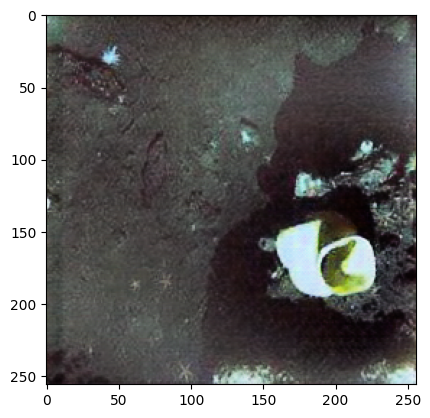

In [9]:
import matplotlib.pyplot as plt

img = plt.imread("./results/facades_pix2pix/test_latest/images/1003_fake_B.png")
plt.imshow(img)

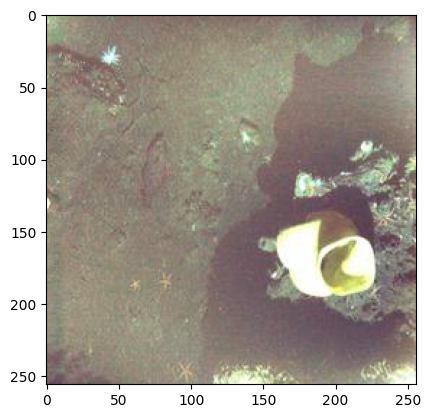

In [10]:
img = plt.imread(
    "./results/facades_label2photo_pretrained/test_latest/images/1003_real_A.png"
)

plt.imshow(img)

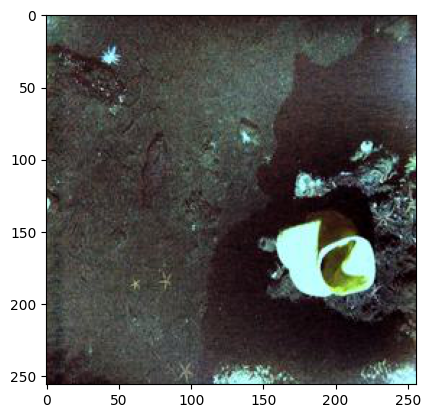

In [11]:
img = plt.imread(
    "./results/facades_label2photo_pretrained/test_latest/images/1003_real_B.png"
)

plt.imshow(img)